# Importing Libraries & Data Reading

Problem Statement: Use decision tree and random forest to classify whether the cancer is benign or malignant.
Give a detailed comparative analysis

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split

SEED=42

random.seed(SEED)
pd.set_option('display.max_columns', None)
FILE_PATH = 'Dataset/Cancer.csv'
TEST_SIZE = 0.2

In [60]:
df=pd.read_csv(FILE_PATH)

# Exploratory Data Analysis

In [61]:
df.shape

(569, 31)

In [62]:
df.head(10)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
8,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
9,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


In [63]:
df.dtypes

Diagnosis                     object
Radius (mean)                float64
Texture (mean)               float64
Perimeter (mean)             float64
Area (mean)                  float64
Smoothness (mean)            float64
Compactness (mean)           float64
Concavity (mean)             float64
Concave points (mean)        float64
Symmetry (mean)              float64
Fractal dimension (mean)     float64
Radius (se)                  float64
Texture (se)                 float64
Perimeter (se)               float64
Area (se)                    float64
Smoothness (se)              float64
Compactness (se)             float64
Concavity (se)               float64
Concave points (se)          float64
Symmetry (se)                float64
Fractal dimension (se)       float64
Radius (worst)               float64
Texture (worst)              float64
Perimeter (worst)            float64
Area (worst)                 float64
Smoothness (worst)           float64
Compactness (worst)          float64
C

In [64]:
df.isnull().sum()

Diagnosis                    0
Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       0
Symmetry (worst)             0
Fractal dimension (worst)    0
dtype: int64

In [65]:
df['Diagnosis']=df['Diagnosis'].map({'M':1,'B':0})

In [66]:
df.head(10)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,0,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
8,0,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
9,0,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


In [67]:
df.describe()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

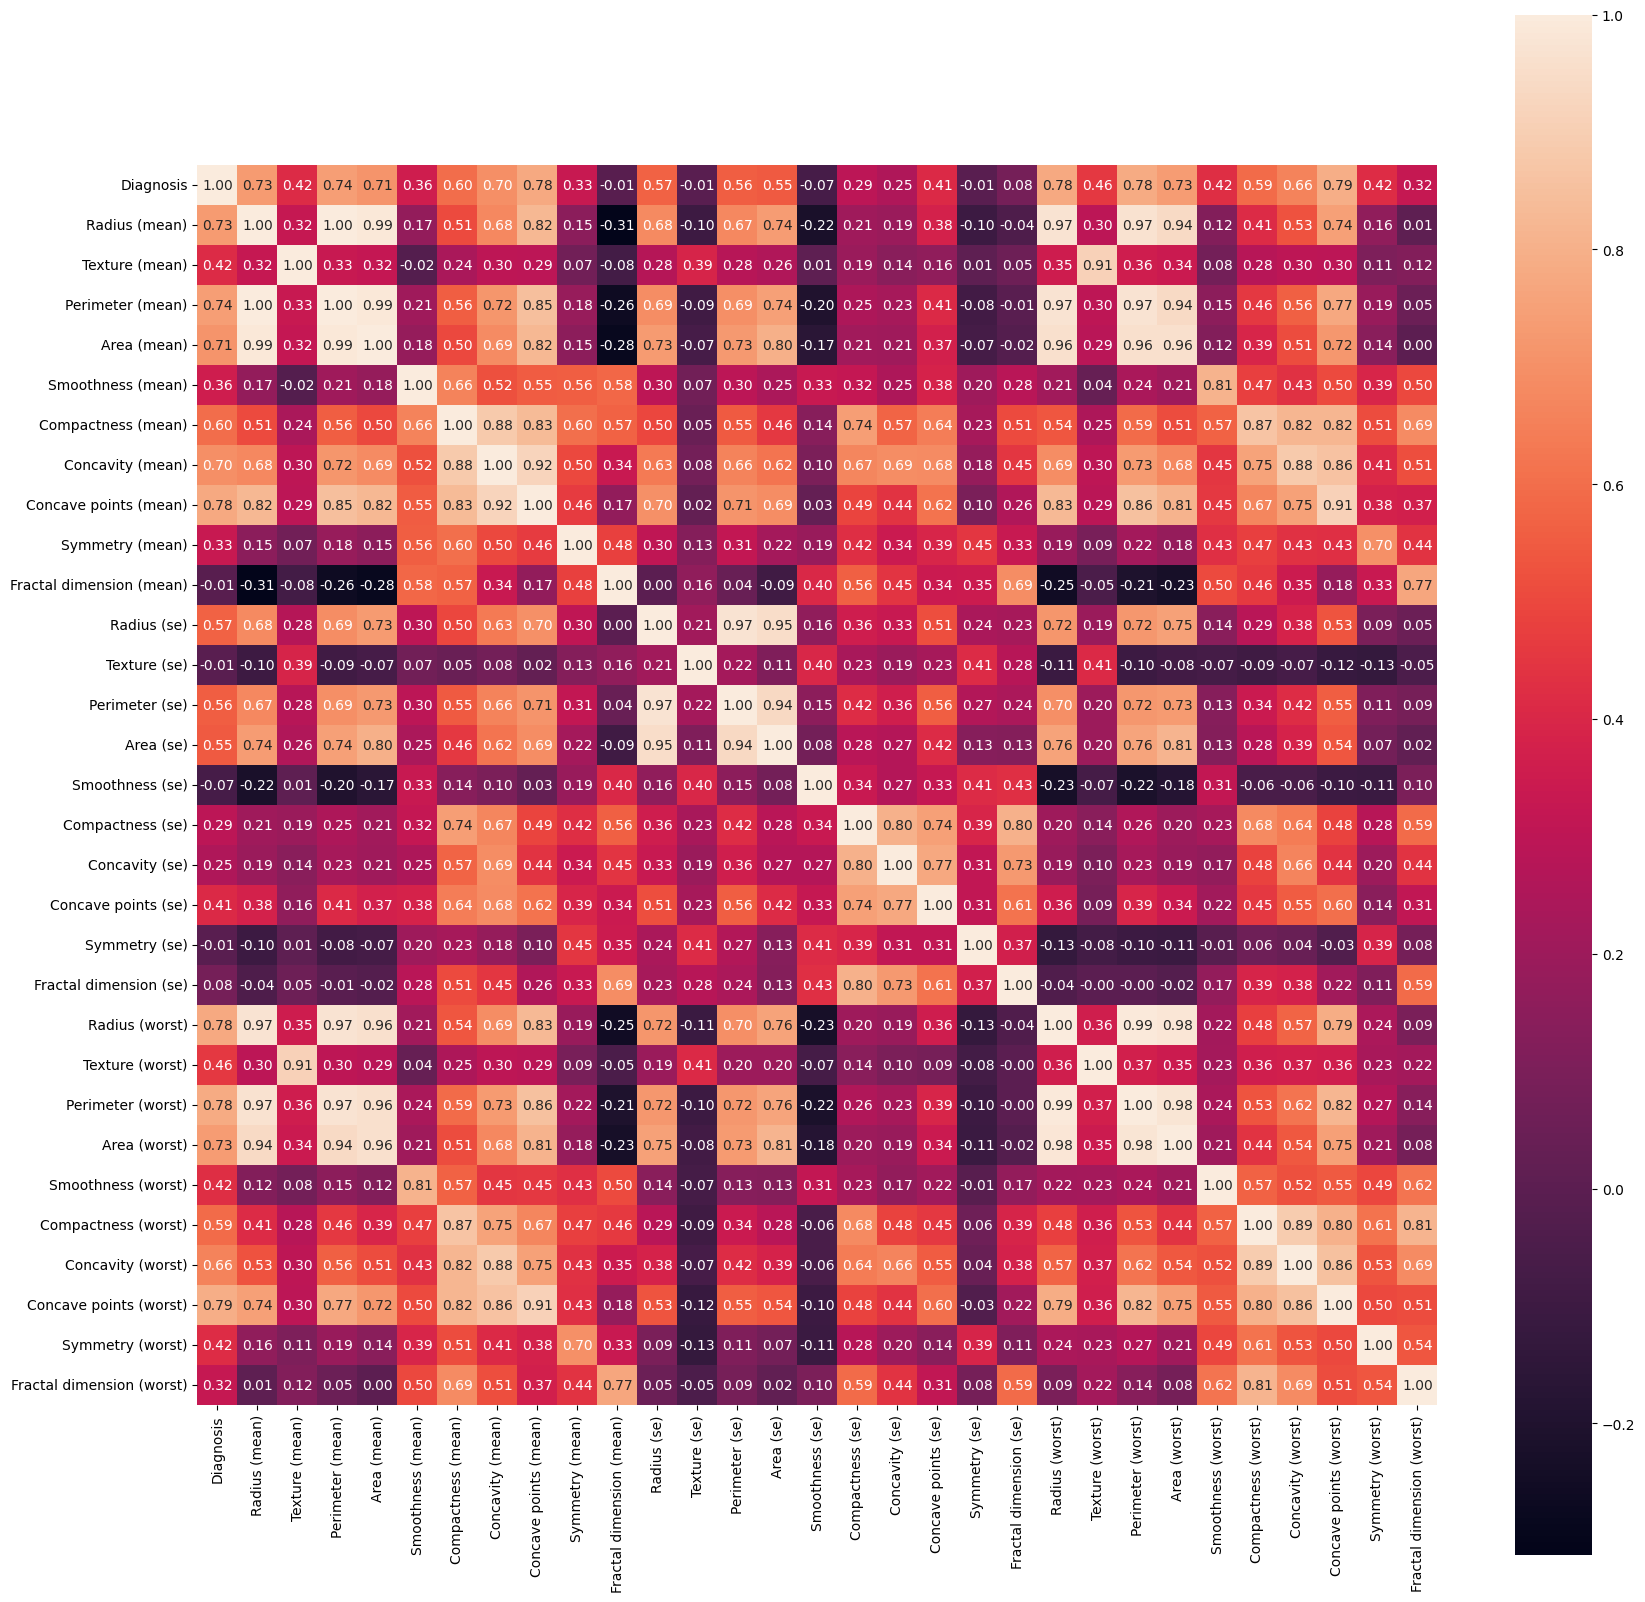

In [68]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= corr.columns.values,
           yticklabels= corr.columns.values)

In [69]:
df.columns

Index(['Diagnosis', 'Radius (mean)', 'Texture (mean)', 'Perimeter (mean)',
       'Area (mean)', 'Smoothness (mean)', 'Compactness (mean)',
       'Concavity (mean)', 'Concave points (mean)', 'Symmetry (mean)',
       'Fractal dimension (mean)', 'Radius (se)', 'Texture (se)',
       'Perimeter (se)', 'Area (se)', 'Smoothness (se)', 'Compactness (se)',
       'Concavity (se)', 'Concave points (se)', 'Symmetry (se)',
       'Fractal dimension (se)', 'Radius (worst)', 'Texture (worst)',
       'Perimeter (worst)', 'Area (worst)', 'Smoothness (worst)',
       'Compactness (worst)', 'Concavity (worst)', 'Concave points (worst)',
       'Symmetry (worst)', 'Fractal dimension (worst)'],
      dtype='object')

In [71]:
df.shape

(569, 31)

In [72]:
y=df['Diagnosis']
X = df.drop(['Diagnosis'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=SEED)


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA()

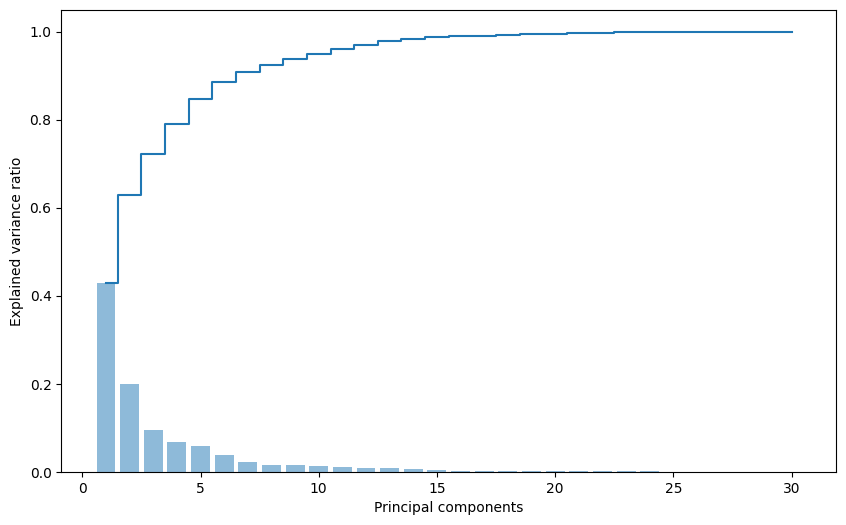

In [75]:
plt.figure(figsize=(10,6))
plt.bar(range(1,X.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


In [76]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [77]:
columns_name=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

X_train=pd.DataFrame(X_train_pca,columns=columns_name)
X_test=pd.DataFrame(X_test_pca,columns=columns_name)

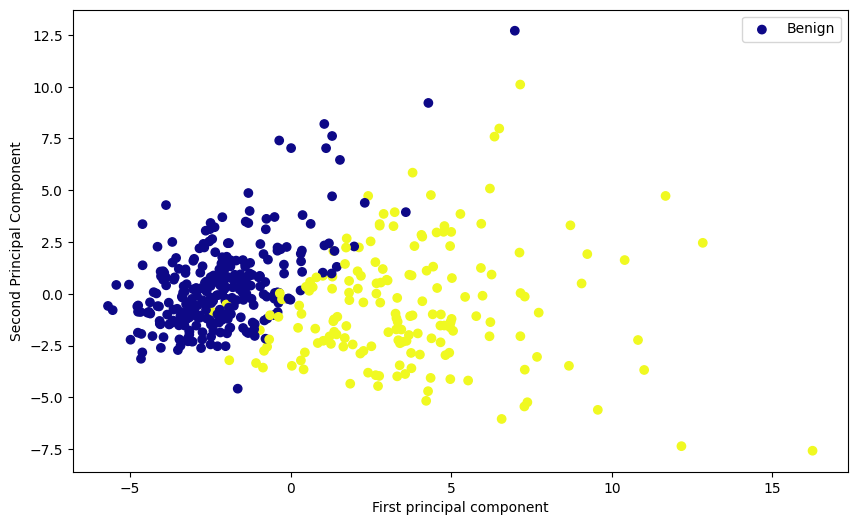

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(X_train['PC1'],X_train['PC2'],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(['Benign','Malignant'])
plt.show()


In [79]:
X_train.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.017151,7.036073,-0.252770,1.836076,0.803297,-0.814880,1.646606,0.117218,0.698785,1.122118
1,-2.397386,0.882303,-0.716995,-1.696238,1.178148,-0.569724,1.140057,1.116109,0.008414,0.492341
2,-0.751321,3.620074,0.885172,-2.055096,-0.514410,-0.612719,1.328035,0.843828,0.682539,1.102083
3,-4.742436,-0.564357,-0.148777,1.372879,-0.022425,-0.363602,0.931485,0.169990,-0.486219,0.313392
4,-2.487298,0.803943,0.389941,0.523713,-1.067507,-0.747701,-0.059058,0.844819,-0.486249,-0.743261


# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=SEED)

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[4,5,6],
    'min_samples_leaf':[4,5,6],
    'min_samples_split':[4,5,6]
}

grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=1)

In [82]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [4, 5, 6]},
             verbose=1)

In [83]:
optimal_dt = grid_search.best_estimator_

In [84]:
optimal_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                       random_state=42)

In [85]:
y_pred_dt = optimal_dt.predict(X_test)

In [86]:
cm = confusion_matrix(y_test,y_pred_dt)

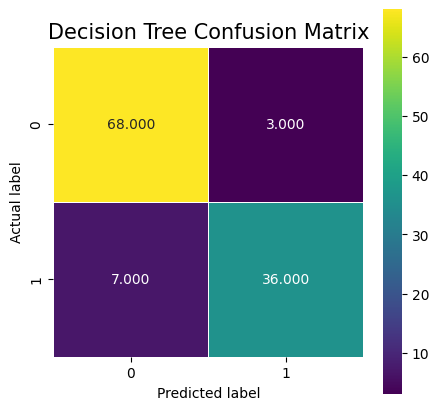

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Confusion Matrix', size = 15)
plt.show()

In [88]:
print("Accuracy score of Decision Tree is: ",accuracy_score(y_test,y_pred_dt))
print("F1 score of Decision Tree is: ",f1_score(y_test,y_pred_dt))

Accuracy score of Decision Tree is:  0.9122807017543859
F1 score of Decision Tree is:  0.878048780487805


# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=SEED,criterion='entropy')

In [90]:
param_grid = {
    'max_depth':[4,5,6],
    'min_samples_leaf':[4,5,6],
    'min_samples_split':[4,5,6]
}

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=1)

In [91]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [4, 5, 6]},
             verbose=1)

In [92]:
optimal_rf = grid_search.best_estimator_

In [93]:
y_pred_rf=optimal_rf.predict(X_test)

In [94]:
cm=confusion_matrix(y_test,y_pred_rf)

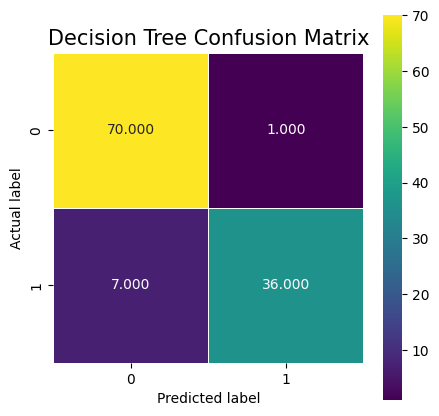

In [95]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Confusion Matrix', size = 15)
plt.show()

In [96]:
print("Accuracy score of Decision Tree is: ",accuracy_score(y_test,y_pred_rf))
print("F1 score of Decision Tree is: ",f1_score(y_test,y_pred_rf))

Accuracy score of Decision Tree is:  0.9298245614035088
F1 score of Decision Tree is:  0.9


# Comparative Analysis